In [1]:
from matplotlib import pyplot as plt

from astroML.plotting import scatter_contour
from astroML.datasets import fetch_sdss_S82standards

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Fetch the Stripe 82 standard star catalog

data = fetch_sdss_S82standards()

g = data['mmu_g']
r = data['mmu_r']
i = data['mmu_i']

#------------------------------------------------------------
# plot the results


In [29]:
def scatter_contour(x, y,
                    levels=10,
                    threshold=100,
                    log_counts=False,
                    histogram2d_args=None,
                    plot_args=None,
                    contour_args=None,
                    filled_contour=True,
                    ax=None):
    """Scatter plot with contour over dense regions
    Parameters
    ----------
    x, y : arrays
        x and y data for the contour plot
    levels : integer or array (optional, default=10)
        number of contour levels, or array of contour levels
    threshold : float (default=100)
        number of points per 2D bin at which to begin drawing contours
    log_counts :boolean (optional)
        if True, contour levels are the base-10 logarithm of bin counts.
    histogram2d_args : dict
        keyword arguments passed to numpy.histogram2d
        see doc string of numpy.histogram2d for more information
    plot_args : dict
        keyword arguments passed to plt.plot.  By default it will use
        dict(marker='.', linestyle='none').
        see doc string of pylab.plot for more information
    contour_args : dict
        keyword arguments passed to plt.contourf or plt.contour
        see doc string of pylab.contourf for more information
    filled_contour : bool
        If True (default) use filled contours. Otherwise, use contour outlines.
    ax : pylab.Axes instance
        the axes on which to plot.  If not specified, the current
        axes will be used
    Returns
    -------
    points, contours :
       points is the return value of ax.plot()
       contours is the return value of ax.contour or ax.contourf
    """
    x = np.asarray(x)
    y = np.asarray(y)

    default_contour_args = dict(zorder=1)
    default_plot_args = dict(marker='.', linestyle='none', zorder=2)

    if plot_args is not None:
        default_plot_args.update(plot_args)
    plot_args = default_plot_args

    if contour_args is not None:
        default_contour_args.update(contour_args)
    contour_args = default_contour_args

    if histogram2d_args is None:
        histogram2d_args = {}

    if contour_args is None:
        contour_args = {}

    if ax is None:
        # Import here so that testing with Agg will work
        from matplotlib import pyplot as plt
        ax = plt.gca()

    H, xbins, ybins = np.histogram2d(x, y, **histogram2d_args)

    if log_counts:
        H = np.log10(1 + H)
        threshold = np.log10(1 + threshold)

    levels = np.asarray(levels)

    if levels.size == 1:
        levels = np.linspace(threshold, H.max(), levels)

    extent = [xbins[0], xbins[-1], ybins[0], ybins[-1]]

    i_min = np.argmin(levels)

    # draw a zero-width line: this gives us the outer polygon to
    # reduce the number of points we draw
    # somewhat hackish... we could probably get the same info from
    # the full contour plot below.
    outline = ax.contour(H.T, levels[i_min:i_min + 1],
                         linewidths=0, extent=extent,
                         alpha=0)

    if filled_contour:
        contours = ax.contourf(H.T, levels, extent=extent, **contour_args)
    else:
        contours = ax.contour(H.T, levels, extent=extent, **contour_args)

    X = np.hstack([x[:, None], y[:, None]])

    if len(outline.allsegs[0]) > 0:
        outer_poly = outline.allsegs[0][0]
        try:
            # this works in newer matplotlib versions
            from matplotlib.path import Path
            points_inside = Path(outer_poly).contains_points(X)
        except:
            # this works in older matplotlib versions
            import matplotlib.nxutils as nx
            points_inside = nx.points_inside_poly(X, outer_poly)

        Xplot = X[~points_inside]
    else:
        Xplot = X

    points = ax.plot(Xplot[:, 0], Xplot[:, 1], **plot_args)

    return points, contours

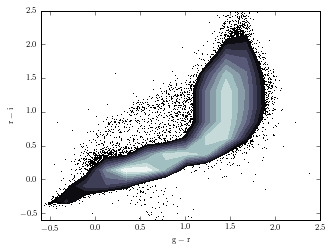

In [30]:
%matplotlib inline
#from astroML.plotting import scatter_contour
fig, ax = plt.subplots(figsize=(5, 3.75))
scatter_contour(g - r, r - i, threshold=500, log_counts=True, ax=ax,
                histogram2d_args=dict(bins=20),
                plot_args=dict(marker=',', color='black'),
                contour_args=dict(cmap=plt.cm.bone))

ax.set_xlabel(r'${\rm g - r}$')
ax.set_ylabel(r'${\rm r - i}$')

ax.set_xlim(-0.6, 2.5)
ax.set_ylim(-0.6, 2.5)

plt.show()

